Lab 5 had two separate tasks. The first was binary classification whereas this one is multi-class.

In [1]:
from tensorflow.keras.datasets import reuters
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

`vectorize_sequences` is reused from the first activity, and is described there.

`to_one_hot` works the same way, but for the labels instead of the values.

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
     results[i, sequence] = 1.
    # ? The . after 1 means it's a float, not an int.
    # ? This is seen often, though is fundamentally identical to "1.0", which is easier to read.
    # ? Leaving it here as a reminder in case it reappears.
    return results

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [4]:
# Vectorise the text from the training and testing data.
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorise the labels of the training and testing data.
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# Make the newly-encoded labels categorical.
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # 46 classes so 46 outputs.
model.compile(optimizer='rmsprop', 
              # ? Different loss function because this isn't binary classification.
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [7]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 2.8849 - accuracy: 0.4203 - val_loss: 2.0051 - val_accuracy: 0.6120
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.6378 - accuracy: 0.6670 - val_loss: 1.4299 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.2105 - accuracy: 0.7509 - val_loss: 1.2176 - val_accuracy: 0.7430
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.9723 - accuracy: 0.7948 - val_loss: 1.0907 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.8080 - accuracy: 0.8292 - val_loss: 1.0125 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 0s 25ms/step - loss: 0.6683 - accuracy: 0.8576 - val_loss: 0.9504 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.5610 - accuracy: 0.8835 - val_loss: 0.9247 - val_accuracy: 0.8080
Epoch 8/20
16

71/71 [==============================] - 0s 4ms/step - loss: 1.0729 - accuracy: 0.7850


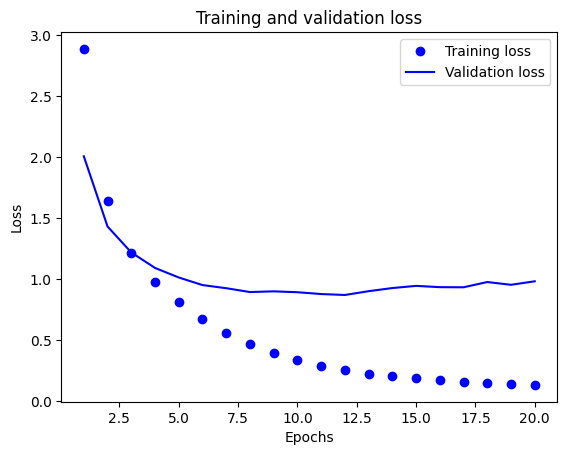

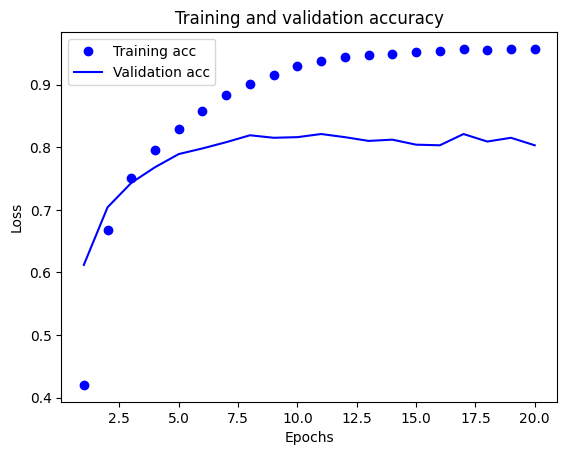

In [8]:
results = model.evaluate(x_test, one_hot_test_labels)

# predictions = model.predict(x_test)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

acc_values = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
"""
If validation loss >> training loss, there's major overfitting.
If validation loss  > training loss, there's some overfitting.
If validation loss  < training loss, there's some underfitting.
If validation loss << training loss, there's major underfitting.
"""